In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('STS-121AscentData.csv')
data

,Time,Altitude,Velocity,Acceleration
0,0,-8,0,2.45
1,20,1244,139,18.62
2,40,5377,298,16.37
3,60,11617,433,19.40
4,80,19872,685,24.50
5,100,31412,1026,24.01
6,120,44726,1279,8.72
7,140,57396,1373,9.70
8,160,67893,1490,10.19
9,180,77485,1634,10.68


In [3]:
def Plotpattern(xoriginal,yoriginal,xpoints,ypoints,xInterpolation,yInterpolation):
    fig = plt.figure(figsize = (8,7))
    plt.plot(xInterpolation, yInterpolation, 'b')
    plt.plot(xoriginal, yoriginal, 'ro')
    plt.plot(xpoints, ypoints, 'ms')
    plt.title('Data')
    plt.grid()
    plt.xlabel('Tempo (s)')
    plt.ylabel('Altitude (Km)')
    plt.show()


Index(['Time', 'Altitude', 'Velocity', 'Acceleration'], dtype='object')
[  0  20  40  60  80 100 120 140 160 180 200 220 240 260 280 300 320 340
 360 380 400 420 440 460 480 500 520]


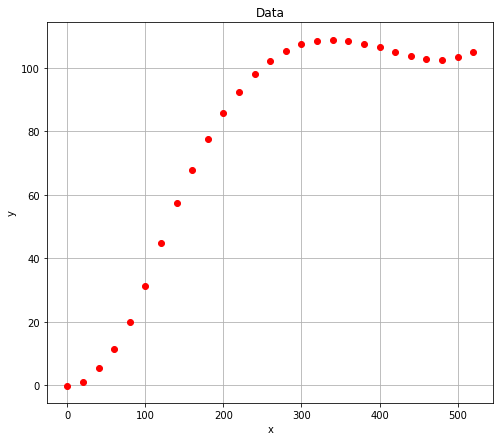

In [4]:
fig = plt.figure(figsize = (8,7))

print(data.columns)

y = data['Altitude'].to_list()
y = [yi/1000 for yi in y]
x = np.arange(0, 540, 20)
print(x)
plt.plot( x, y, 'ro')
plt.title('Data')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Lagrange

In [5]:
def P(xt,x,i):
    result = []
    for j in range(len(x)):
        if(j != i):
            result.append((xt-x[j])/(x[i]-x[j]))
    return np.prod(result)
         

def Lagrange(x,y,xt):
    result = []
    for i in range(len(x)):
        result.append(y[i]*P(xt,x,i))
    return np.sum(result)

In [6]:
def getNearPoints(n, x ,y, xTarget):
    xpLeft = []
    ypLeft = []
    xpRight = []
    ypRight = []
    nLeft = 0
    nRight = 0
    for i in range(len(x)):
        if x[i] < xTarget:
            if nLeft < n:
                xpLeft.append(x[i])
                ypLeft.append(y[i])
                nLeft += 1
            else:
                xpLeft.pop(0)
                ypLeft.pop(0)
                xpLeft.append(x[i])
                ypLeft.append(y[i])
                nLeft += 1

        if x[i] > xTarget:
            if nRight < n:
                xpRight.append(x[i])
                ypRight.append(y[i])
                nRight += 1
            else:
                break
        
        xp = xpLeft + xpRight
        yp = ypLeft + ypRight
        
    return xp, yp
    

[  0  40  80 120 160 200 240 280 320 360 400 440 480 520]
[-0.008, 5.377, 19.872, 44.726, 67.893, 85.662, 98.004, 105.321, 108.619, 108.543, 106.539, 103.775, 102.552, 105.069]
[0.0, 0.9031306689980678, 0.0, 0.9076487072707629, 0.0, 0.46241726672650785, 0.0, 0.45184176957606326, 0.0, 0.027485657334310076, 0.0, 0.02739977657797965, 0.0, 0.07416767227644527, 0.0, 0.02343746602539909, 0.0, 0.008838049292634764, 0.0, 0.043041455149548824, 0.0, 0.1539756296873236, 0.0, 0.5522913106679965, 0.0, 3.5514936345807513, 0.0]
Erro total: 7.187169064163791


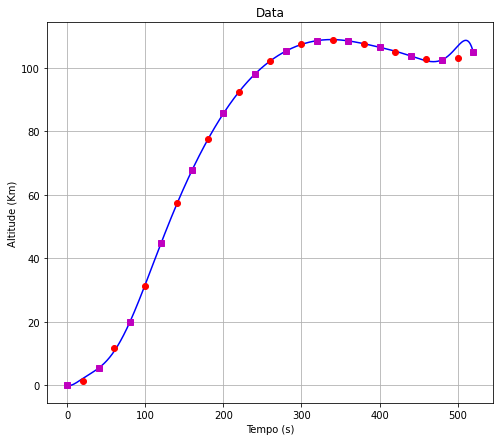

In [7]:
xtarget = np.arange(0, 560, 40)
ytarget = [y[i*2] for i in range(len(xtarget))]

print(xtarget)
print(ytarget)

xLagrange = np.arange(0.0, 520.1, 0.1)
yLagrange = [Lagrange(xtarget,ytarget,i)for i in xLagrange]

firstError = []
for i in range(len(x)):
    firstError.append(abs(Lagrange(xtarget,ytarget,x[i])-y[i]))

print(firstError)
print("Erro total: " +str(np.sum(firstError))) 

Plotpattern(x,y,xtarget,ytarget,xLagrange,yLagrange)

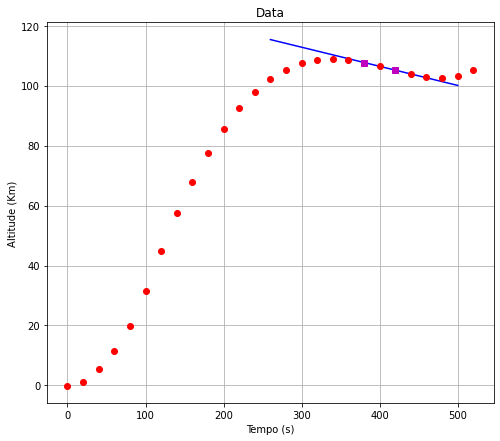

Erro = 0.12300000000000466


In [8]:
xtarget ,ytarget = getNearPoints(1,x,y,x[20])

xLagrange = np.arange(260, 500.1, 0.1)
yLagrange = [Lagrange(xtarget,ytarget,i) for i in xLagrange]

Plotpattern(x,y,xtarget,ytarget,xLagrange,yLagrange)
print("Erro = " + str(abs(Lagrange(xtarget,ytarget,x[20])-y[20])))

In [9]:
errorSum = []
for i in range(len(x)):
    xtarget ,ytarget = getNearPoints(1,x,y,x[i])
    yLagrange = Lagrange(xtarget,ytarget,x[i])
    error = abs(yLagrange - y[i])
    errorSum.append(error)

print(errorSum)

print("Erro total: " + str(np.sum(errorSum)))

[1.252, 1.4405, 1.0535000000000005, 1.0074999999999985, 1.6424999999999983, 0.8870000000000005, 0.32200000000000273, 1.086500000000001, 0.45250000000000057, 0.707499999999996, 0.679000000000002, 0.6479999999999961, 0.6130000000000138, 0.6385000000000076, 0.44599999999999795, 0.4789999999999992, 0.4235000000000042, 0.36099999999999, 0.22700000000000387, 0.1490000000000009, 0.12300000000000466, 0.01500000000001478, 0.19950000000000045, 0.35649999999999693, 0.4999999999999858, 0.5135000000000076, 1.7720000000000056]
Erro total: 17.99500000000003


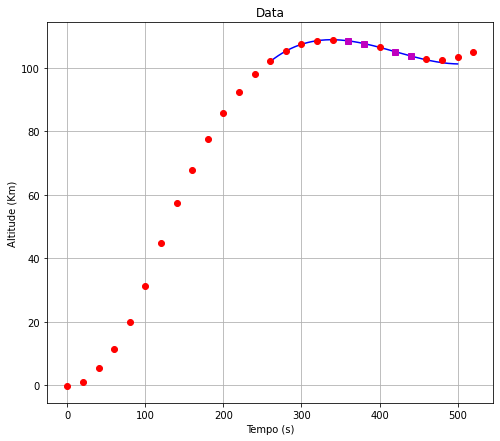

Erro = 0.03733333333335054


In [10]:
xtarget ,ytarget = getNearPoints(2,x,y,x[20])

xLagrange = np.arange(260, 500.1, 0.1)
yLagrange = [Lagrange(xtarget,ytarget,i) for i in xLagrange]

Plotpattern(x,y,xtarget,ytarget,xLagrange,yLagrange)
print("Erro = " + str(abs(Lagrange(xtarget,ytarget,x[20])-y[20])))

In [11]:
errorSum = []
for i in range(len(x)):
    xtarget ,ytarget = getNearPoints(2,x,y,x[i])
    yLagrange = Lagrange(xtarget,ytarget,x[i])
    error = abs(yLagrange - y[i])
    errorSum.append(error)

print(errorSum)

print("Erro total: " + str(np.sum(errorSum)))

[2.881, 0.2579999999999998, 0.11366666666666614, 0.2270000000000003, 0.46350000000000335, 0.1511666666666649, 0.14816666666666833, 0.4661666666666733, 0.29633333333332246, 0.09449999999999648, 0.0008333333333467863, 0.0013333333333349628, 0.02016666666665401, 0.07266666666667732, 0.07516666666666083, 0.02949999999999875, 0.0023333333333539485, 0.0238333333333145, 0.018666666666632636, 0.017333333333340306, 0.03733333333335054, 0.015500000000002956, 0.009166666666644119, 0.004500000000007276, 0.043333333333322344, 0.009000000000014552, 1.0270000000000152]
Erro total: 6.507166666666666


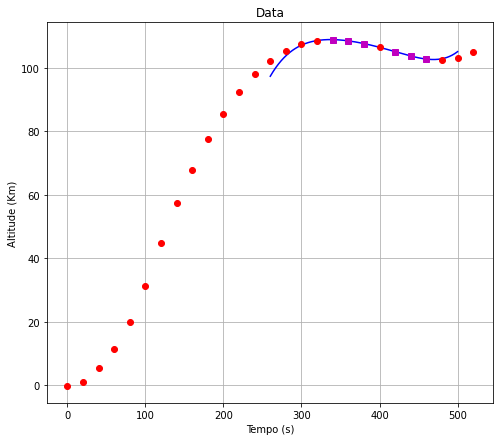

Erro = 0.022950000000008686


In [12]:
xtarget ,ytarget = getNearPoints(3,x,y,x[20])

xLagrange = np.arange(260, 500.1, 0.1)
yLagrange = [Lagrange(xtarget,ytarget,i) for i in xLagrange]

Plotpattern(x,y,xtarget,ytarget,xLagrange,yLagrange)
print("Erro = " + str(abs(Lagrange(xtarget,ytarget,x[20])-y[20])))

In [13]:
errorSum = []
for i in range(len(x)):
    xtarget ,ytarget = getNearPoints(3,x,y,x[i])
    yLagrange = Lagrange(xtarget,ytarget,x[i])
    error = abs(yLagrange - y[i])
    errorSum.append(error)

print(errorSum)

print("Erro total: " + str(np.sum(errorSum)))

[0.774, 0.17049999999999854, 0.0680000000000005, 0.2411499999999993, 0.3008500000000005, 0.0038999999999944635, 0.00560000000000116, 0.32415000000000305, 0.3459999999999894, 0.14534999999999343, 0.028249999999985675, 0.006599999999991724, 0.03429999999998756, 0.07220000000002358, 0.07574999999999932, 0.039550000000005525, 0.01459999999998729, 0.019199999999983675, 0.013149999999981787, 0.016000000000019554, 0.022950000000008686, 0.0008499999999713737, 0.008799999999979491, 0.013049999999978468, 0.023299999999991883, 0.06499999999998352, 0.027000000000029445]
Erro total: 2.860049999999889


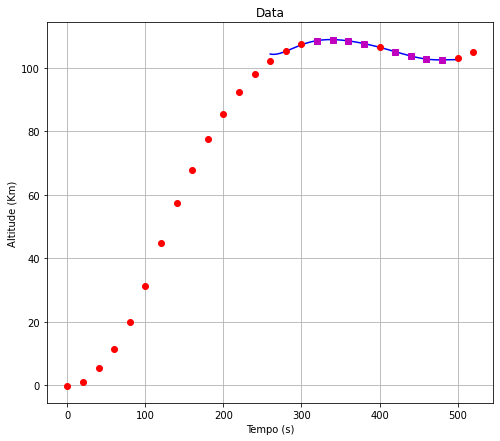

Erro = 0.01744285714283933


In [14]:
xtarget ,ytarget = getNearPoints(4,x,y,x[20])

xLagrange = np.arange(260, 500.1, 0.1)
yLagrange = [Lagrange(xtarget,ytarget,i) for i in xLagrange]

Plotpattern(x,y,xtarget,ytarget,xLagrange,yLagrange)
print("Erro = " + str(abs(Lagrange(xtarget,ytarget,x[20])-y[20])))

In [15]:
errorSum = []
for i in range(len(x)):
    xtarget ,ytarget = getNearPoints(4,x,y,x[i])
    yLagrange = Lagrange(xtarget,ytarget,x[i])
    error = abs(yLagrange - y[i])
    errorSum.append(error)

print(errorSum)

print("Erro total: " + str(np.sum(errorSum)))

[0.6819999999999977, 0.13600000000000212, 0.32153333333333567, 0.3097142857142856, 0.2419285714285735, 0.08978571428570703, 0.09692857142857747, 0.2856857142856981, 0.33185714285714596, 0.18998571428569733, 0.05955714285713043, 0.021642857142836647, 0.04211428571427689, 0.07269999999998333, 0.07521428571430988, 0.048414285714258654, 0.02512857142858138, 0.018899999999959505, 0.008428571428567011, 0.011942857142898333, 0.01744285714283933, 0.003557142857175677, 0.009000000000014552, 0.012485714285688232, 0.017399999999980764, 0.046599999999983766, 0.2599999999999483]
Erro total: 3.435947619047453


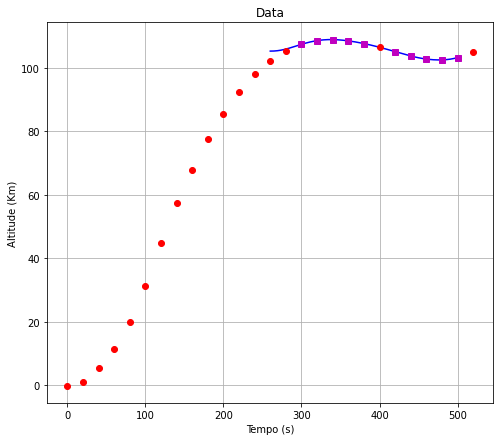

Erro = 0.013996031746003723


In [16]:
xtarget ,ytarget = getNearPoints(5,x,y,x[20])

xLagrange = np.arange(260, 500.1, 0.1)
yLagrange = [Lagrange(xtarget,ytarget,i) for i in xLagrange]

Plotpattern(x,y,xtarget,ytarget,xLagrange,yLagrange)
print("Erro = " + str(abs(Lagrange(xtarget,ytarget,x[20])-y[20])))

In [17]:
errorSum = []
for i in range(len(x)):
    xtarget ,ytarget = getNearPoints(5,x,y,x[i])
    yLagrange = Lagrange(xtarget,ytarget,x[i])
    error = abs(yLagrange - y[i])
    errorSum.append(error)

print(errorSum)

print("Erro total: " + str(np.sum(errorSum)))

[0.6800000000000184, 0.8038333333333354, 0.5161904761904763, 0.3024107142857133, 0.18428571428572127, 0.14400793650793986, 0.15814682539681257, 0.27782142857142134, 0.31649603174604124, 0.21427380952378883, 0.09187301587299146, 0.040265873015854936, 0.049603174603149114, 0.07298015873014663, 0.07542857142854587, 0.05476984126987361, 0.032658730158729554, 0.019821428571418664, 0.0066150793650479045, 0.009138888888912788, 0.013996031746003723, 0.004321428571429919, 0.0030238095238246387, 0.011249999999975557, 0.020809523809532493, 0.04349999999998033, 0.2330000000000183]
Erro total: 4.380521825396704


# Newton

In [18]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

[0.0, 0.9031306689980678, 0.0, 0.9076487072707629, 0.0, 0.46241726672650785, 0.0, 0.45184176957606326, 0.0, 0.027485657334310076, 0.0, 0.02739977657797965, 0.0, 0.07416767227644527, 0.0, 0.02343746602539909, 0.0, 0.008838049292634764, 0.0, 0.043041455149548824, 0.0, 0.1539756296873236, 0.0, 0.5522913106679965, 0.0, 3.5514936345807513, 0.0]
Erro total: 7.187169064163791


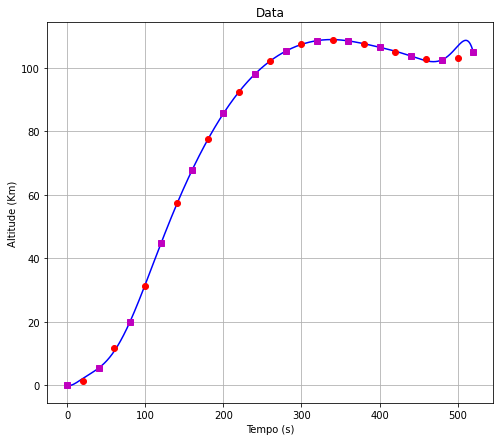

In [19]:
xtarget = np.arange(0, 560, 40)
ytarget = [y[i*2] for i in range(len(xtarget))]
# get the divided difference coef
a_s = divided_diff(xtarget, ytarget)[0, :]

# evaluate on new data points
x_new = np.arange(0, 520.1, 0.1)
y_new = newton_poly(a_s, xtarget, x_new)

firstError = []
for i in range(len(x)):
    firstError.append(abs(Lagrange(xtarget,ytarget,x[i])-y[i]))

print(firstError)
print("Erro total: " +str(np.sum(firstError))) 

Plotpattern(x,y,xtarget,ytarget,x_new,y_new)

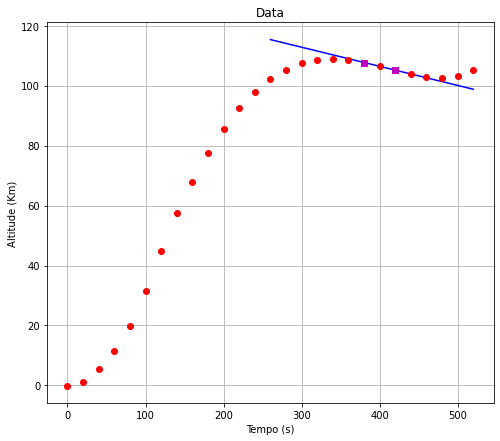

Erro = 0.12300000000000466


In [20]:
xtarget ,ytarget = getNearPoints(1,x,y,x[20])
# get the divided difference coef
a_s = divided_diff(xtarget, ytarget)[0, :]

# evaluate on new data points
x_new = np.arange(260, 520.1, 0.1)
y_new = newton_poly(a_s, xtarget, x_new)


Plotpattern(x,y,xtarget,ytarget,x_new,y_new)
print("Erro = " + str(abs(newton_poly(a_s, xtarget, x[20])-y[20])))

In [21]:
errorSum = []
for i in range(len(x)):
    xtarget ,ytarget = getNearPoints(1,x,y,x[i])
    a_s = divided_diff(xtarget, ytarget)[0, :]
    yNewton = newton_poly(a_s, xtarget, x[i])
    error = abs(yNewton - y[i])
    errorSum.append(error)

print(errorSum)

print("Erro total: " + str(np.sum(errorSum)))

[1.252, 1.4405, 1.0535000000000005, 1.0075000000000003, 1.6424999999999983, 0.8870000000000005, 0.32200000000000273, 1.086500000000001, 0.45250000000000057, 0.707499999999996, 0.679000000000002, 0.6479999999999961, 0.6130000000000138, 0.6385000000000076, 0.44599999999999795, 0.4789999999999992, 0.4235000000000042, 0.36099999999999, 0.22700000000000387, 0.1490000000000009, 0.12300000000000466, 0.01500000000001478, 0.19950000000000045, 0.35649999999999693, 0.4999999999999858, 0.5135000000000076, 1.7720000000000056]
Erro total: 17.995000000000033


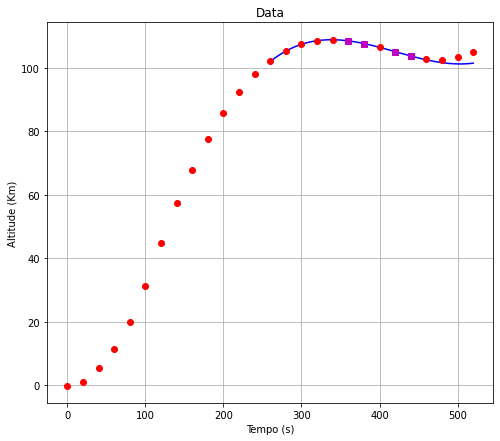

Erro = 0.03733333333333633


In [22]:
xtarget ,ytarget = getNearPoints(2,x,y,x[20])
# get the divided difference coef
a_s = divided_diff(xtarget, ytarget)[0, :]

# evaluate on new data points
x_new = np.arange(260, 520.1, 0.1)
y_new = newton_poly(a_s, xtarget, x_new)


Plotpattern(x,y,xtarget,ytarget,x_new,y_new)
print("Erro = " + str(abs(newton_poly(a_s, xtarget, x[20])-y[20])))

In [23]:
errorSum = []
for i in range(len(x)):
    xtarget ,ytarget = getNearPoints(2,x,y,x[i])
    a_s = divided_diff(xtarget, ytarget)[0, :]
    yNewton = newton_poly(a_s, xtarget, x[i])
    error = abs(yNewton - y[i])
    errorSum.append(error)

print(errorSum)

print("Erro total: " + str(np.sum(errorSum)))

[2.8810000000000002, 0.2579999999999998, 0.11366666666666525, 0.2270000000000003, 0.4634999999999998, 0.1511666666666649, 0.14816666666666833, 0.4661666666666662, 0.29633333333333667, 0.09449999999999648, 0.0008333333333467863, 0.001333333333320752, 0.02016666666665401, 0.0726666666666631, 0.07516666666666083, 0.02949999999999875, 0.0023333333333397377, 0.0238333333333145, 0.018666666666646847, 0.017333333333340306, 0.03733333333333633, 0.015499999999988745, 0.00916666666665833, 0.004500000000007276, 0.043333333333322344, 0.009000000000014552, 1.0270000000000152]
Erro total: 6.507166666666627


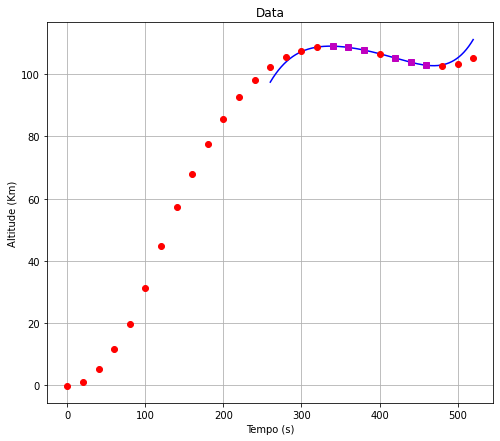

Erro = 0.022950000000008686


In [24]:
xtarget ,ytarget = getNearPoints(3,x,y,x[20])
# get the divided difference coef
a_s = divided_diff(xtarget, ytarget)[0, :]

# evaluate on new data points
x_new = np.arange(260, 520.1, 0.1)
y_new = newton_poly(a_s, xtarget, x_new)


Plotpattern(x,y,xtarget,ytarget,x_new,y_new)
print("Erro = " + str(abs(newton_poly(a_s, xtarget, x[20])-y[20])))

In [25]:
errorSum = []
for i in range(len(x)):
    xtarget ,ytarget = getNearPoints(3,x,y,x[i])
    a_s = divided_diff(xtarget, ytarget)[0, :]
    yNewton = newton_poly(a_s, xtarget, x[i])
    error = abs(yNewton - y[i])
    errorSum.append(error)

print(errorSum)

print("Erro total: " + str(np.sum(errorSum)))

[0.7739999999999989, 0.17049999999999876, 0.06800000000000139, 0.2411499999999993, 0.3008500000000005, 0.003900000000001569, 0.00560000000000116, 0.32415000000000305, 0.3459999999999894, 0.14534999999999343, 0.028249999999985675, 0.006599999999991724, 0.03429999999998756, 0.07219999999999516, 0.07574999999999932, 0.039549999999991314, 0.01459999999998729, 0.019199999999983675, 0.013149999999981787, 0.016000000000005343, 0.022950000000008686, 0.0008499999999855845, 0.008799999999993702, 0.013049999999992679, 0.023299999999991883, 0.06499999999998352, 0.027000000000029445]
Erro total: 2.860049999999882


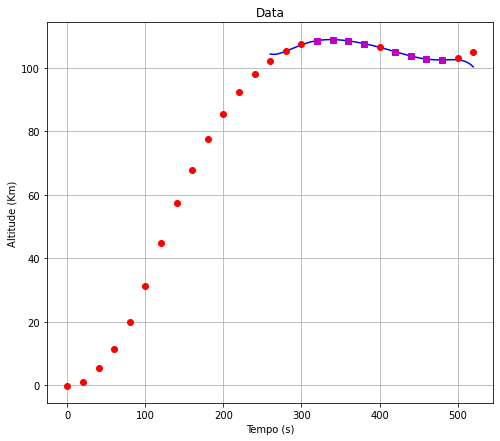

Erro = 0.01744285714286775


In [26]:
xtarget ,ytarget = getNearPoints(4,x,y,x[20])
# get the divided difference coef
a_s = divided_diff(xtarget, ytarget)[0, :]

# evaluate on new data points
x_new = np.arange(260, 520.1, 0.1)
y_new = newton_poly(a_s, xtarget, x_new)


Plotpattern(x,y,xtarget,ytarget,x_new,y_new)
print("Erro = " + str(abs(newton_poly(a_s, xtarget, x[20])-y[20])))

In [27]:
errorSum = []
for i in range(len(x)):
    xtarget ,ytarget = getNearPoints(4,x,y,x[i])
    a_s = divided_diff(xtarget, ytarget)[0, :]
    yNewton = newton_poly(a_s, xtarget, x[i])
    error = abs(yNewton - y[i])
    errorSum.append(error)

print(errorSum)

print("Erro total: " + str(np.sum(errorSum)))

[0.6819999999999957, 0.1360000000000019, 0.3215333333333348, 0.3097142857142874, 0.2419285714285735, 0.08978571428571414, 0.09692857142857747, 0.2856857142857194, 0.33185714285713175, 0.18998571428569733, 0.05955714285713043, 0.021642857142836647, 0.04211428571427689, 0.07269999999999754, 0.07521428571428146, 0.048414285714287075, 0.02512857142856717, 0.018899999999987926, 0.0084285714285528, 0.011942857142869912, 0.01744285714286775, 0.003557142857147255, 0.00899999999998613, 0.012485714285702443, 0.017399999999980764, 0.046599999999983766, 0.2599999999999483]
Erro total: 3.435947619047438


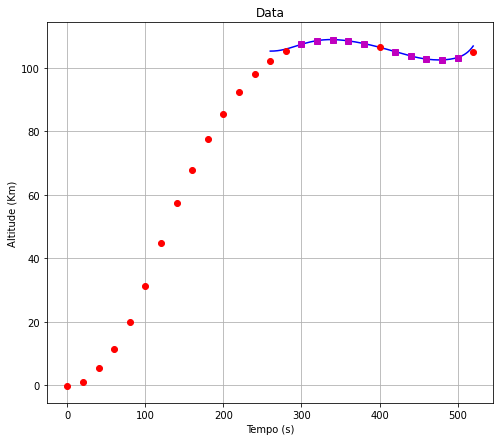

Erro = 0.013996031746046356


In [28]:
xtarget ,ytarget = getNearPoints(5,x,y,x[20])
# get the divided difference coef
a_s = divided_diff(xtarget, ytarget)[0, :]

# evaluate on new data points
x_new = np.arange(260, 520.1, 0.1)
y_new = newton_poly(a_s, xtarget, x_new)


Plotpattern(x,y,xtarget,ytarget,x_new,y_new)
print("Erro = " + str(abs(newton_poly(a_s, xtarget, x[20])-y[20])))

In [29]:
errorSum = []
for i in range(len(x)):
    xtarget ,ytarget = getNearPoints(5,x,y,x[i])
    a_s = divided_diff(xtarget, ytarget)[0, :]
    yNewton = newton_poly(a_s, xtarget, x[i])
    error = abs(yNewton - y[i])
    errorSum.append(error)

print(errorSum)

print("Erro total: " + str(np.sum(errorSum)))

[0.6800000000000097, 0.8038333333333366, 0.516190476190479, 0.3024107142857133, 0.18428571428571772, 0.14400793650793275, 0.15814682539682678, 0.27782142857142844, 0.31649603174602703, 0.21427380952378883, 0.09187301587300567, 0.040265873015854936, 0.049603174603163325, 0.07298015873014663, 0.07542857142857429, 0.05476984126983098, 0.03265873015871534, 0.019821428571418664, 0.006615079365062115, 0.009138888888898578, 0.013996031746046356, 0.00432142857144413, 0.003023809523796217, 0.011249999999989768, 0.02080952380950407, 0.04349999999996612, 0.23299999999990462]
Erro total: 4.380521825396582


## Lagrage v.s Newton

Método    | Erro Total Lagrange | Erro Total Newton |
--------- | ------------------- | ------------------|
Alternado | 7.187169064163332   | 7.187169064163791 |
Vizinho 1 | 17.99500000000003   | 17.995000000000033|
Vizinho 2 | 6.507166666666624   | 6.507166666666627 |
Vizinho 3 | 2.8600500000000256  | 2.860049999999882 |
Vizinho 4 | 3.4359476190476926  | 3.435947619047438 |
Vizinho 5 | 4.380521825396753   | 4.380521825396753 |

In [30]:
print(7.187169064163332 - 7.187169064163791)
print(17.99500000000003 - 17.995000000000033)
print(6.507166666666624 - 6.507166666666627)
print(2.8600500000000256 - 2.860049999999882)
print(3.4359476190476926 - 3.435947619047438)
print(4.380521825396753 - 4.380521825396753)
print(2.860049999999882 - 2.4641279200386297)

-4.583000645652646e-13
-3.552713678800501e-15
-2.6645352591003757e-15
1.4344081478157023e-13
2.5490720645393594e-13
0.0
0.3959220799612524


# Gaus-Jacobi

In [31]:
from numpy.linalg import *

def jacobi(A, b, x0, tol, maxiter=200):
    """
    Performs Jacobi iterations to solve the line system of
    equations, Ax=b, starting from an initial guess, ``x0``.

    Terminates when the change in x is less than ``tol``, or
    if ``maxiter`` [default=200] iterations have been exceeded.

    Returns 3 variables:
        1.  x, the estimated solution
        2.  rel_diff, the relative difference between last 2
            iterations for x
        3.  k, the number of iterations used.  If k=maxiter,
            then the required tolerance was not met.
    """
    n = A.shape[0]
    x = x0.copy()
    x_prev = x0.copy()
    k = 0
    rel_diff = tol * 2

    # (rel_diff > tol) and 
    while (k < maxiter):

        for i in range(0, n):
            subs = 0.0
            for j in range(0, n):
                if i != j:
                    subs += A[i,j] * x_prev[j]

            x[i] = (b[i] - subs ) / A[i,i]
        k += 1

        rel_diff = norm(x - x_prev) / norm(x)
        #print(x, rel_diff, norm(x - x_prev), norm(x))
        x_prev = x.copy()

    return x, rel_diff, k

# Main code starts here
# ---------------------
GL = 1.6
d = 0.8
A = np.array([
    [2.0, 1.0],
    [ 3.0, 4.0]])
b = [1, -1]
x0 = np.zeros(2)

tol = 1E-9
maxiter = 200
coefsResult, rel_diff, k = jacobi(A, b, x0, tol, maxiter)
if k == maxiter:
    print(('WARNING: the Jacobi iterations did not '
        'converge within the required tolerance.'))
print(('The solution is %s; within a tolerance of %g, '
        'using %d iterations.' % (coefsResult, rel_diff, k)))
print('Solution error = norm(Ax-b) = %g' % \
            norm(np.dot(A,coefsResult)-b)) 
print('Condition number of A = %0.5f' % cond(A))
print('Solution from built-in functions = %s' % solve(A, b))


The solution is [ 1. -1.]; within a tolerance of 0, using 200 iterations.
Solution error = norm(Ax-b) = 0
Condition number of A = 5.82843
Solution from built-in functions = [ 1. -1.]


# Ajuste 

In [32]:
def linearFit(x,y):
   
    n = len(x)
    sumX = np.sum(x)
    sumY = np.sum(y) 

    xSquare = [x[i]*x[i] for i in range(len(x))]
    sumxSquare = np.sum(xSquare)

    XtY = [x[i]*y[i] for i in range(len(x))]
    sumXtY = np.sum(XtY)


    A= np.array([[(n+1), sumX],
                 [sumX , sumxSquare]])
    b = [sumY, sumXtY]
    x0 = np.zeros(2)
    
    tol = 1E-9
    maxiter = 200
    coefsResult, rel_diff, k = jacobi(A, b, x0, tol, maxiter)
    if k == maxiter:
        print(('WARNING: the Jacobi iterations did not '
            'converge within the required tolerance.'))
    print(('The solution is %s; within a tolerance of %g, '
            'using %d iterations.' % (coefsResult, rel_diff, k)))
    print('Solution error = norm(Ax-b) = %g' % \
                norm(np.dot(A,coefsResult)-b)) 
    print('Condition number of A = %0.5f' % cond(A))
    print('Solution from built-in functions = %s' % solve(A, b))
    return coefsResult


In [33]:
def apllyFit(x, coefs):
    result = []
    result.append(coefs[0])
    for i in range(1,len(coefs)):
        result.append((x**(i))*coefs[i])
    return np.sum(result)

def apllyFit2(x, coefs):
    result = []
    result.append(coefs[0])
    result.append(coefs[1]*x)
    result.append(coefs[2]*(x**2))
    return np.sum(result)

def apllyFit3(x, coefs):
    result = []
    result.append(coefs[0])
    result.append(coefs[1]*x)
    result.append(coefs[2]*(x**2))
    result.append(coefs[3]*(x**3))
    return np.sum(result)

def apllyFit4(x, coefs):
    result = []
    result.append(coefs[0])
    result.append(coefs[1]*x)
    result.append(coefs[2]*(x**2))
    result.append(coefs[3]*(x**3))
    result.append(coefs[4]*(x**4))
    return np.sum(result)


The solution is [17.95508121  0.22342802]; within a tolerance of 5.93557e-15, using 200 iterations.
Solution error = norm(Ax-b) = 6.98494e-10
Condition number of A = 305019.27150
Solution from built-in functions = [17.95508121  0.22342802]
[  0  20  40  60  80 100 120 140 160 180 200 220 240 260 280 300 320 340
 360 380 400 420 440 460 480 500 520]
[-0.008, 1.244, 5.377, 11.617, 19.872, 31.412, 44.726, 57.396, 67.893, 77.485, 85.662, 92.481, 98.004, 102.301, 105.321, 107.449, 108.619, 108.942, 108.543, 107.69, 106.539, 105.142, 103.775, 102.807, 102.552, 103.297, 105.069]


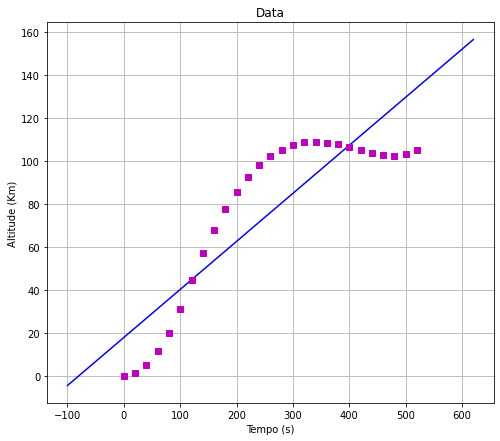

In [34]:
coefs = linearFit(x,y)

x_newL = np.arange(-100, 620,0.1)
y_newL = [apllyFit(x_n,coefs) for x_n in x_newL]

print (x)
print (y)

Plotpattern(x,y,x,y,x_newL,y_newL)

In [35]:
def QuadraticFit(x,y):
    n = len(x)
    sumX = np.sum(x)
    sumY = np.sum(y) 

    xSquare = [x[i]*x[i] for i in range(len(x))]
    sumxSquare = np.sum(xSquare)

    xCubic =  [x[i]**3 for i in range(len(x))]
    sumxCubic = np.sum(xCubic)

    xFourth = [x[i]**4 for i in range(len(x))]
    sumxFourth = np.sum(xFourth)

    XtY = [x[i]*y[i] for i in range(len(x))]
    sumXtY = np.sum(XtY)

    #X2tY = [(x[i]**2)*y[i] for i in range(len(x))]
    X2tY = []
    for i in range(len(x)):
        X2tY.append((x[i]**2)*y[i])

    sumX2tY = np.sum(X2tY)

    A= np.array([[(n+1)     , sumX      , sumxSquare],
                 [sumX      , sumxSquare, sumxCubic ],
                 [sumxSquare, sumxCubic , sumxFourth]])

    b = [sumY, sumXtY, sumX2tY]
    
    

    # Find diagonal coefficients
    diag = np.diag(np.abs(A)) 

    # Find row sum without diagonal
    off_diag = np.sum(np.abs(A), axis=1) - diag 

    if np.all(diag > off_diag):
        print('matrix is diagonally dominant')
    else:
        print('NOT diagonally dominant')



    x0 = np.zeros(3)
    #x0 = np.array([0.1,0.1,0.1])
    
    tol = 1E-9
    maxiter = 100
    coefsResult, rel_diff, k = jacobi(A, b, x0, tol, maxiter)
    if k == maxiter:
        print(('WARNING: the Jacobi iterations did not '
            'converge within the required tolerance.'))
    print(('The solution is %s; within a tolerance of %g, '
            'using %d iterations.' % (coefsResult, rel_diff, k)))
    print('Solution error = norm(Ax-b) = %g' % \
                norm(np.dot(A,coefsResult)-b)) 
    print('Condition number of A = %0.5f' % cond(A))
    print('Solution from built-in functions = %s' % solve(A, b))
    return coefsResult

In [36]:
def QuadraticFit2(x,y):
    n = len(x)
    sumX = np.sum(x)
    sumY = np.sum(y) 

    xSquare = [x[i]*x[i] for i in range(len(x))]
    sumxSquare = np.sum(xSquare)

    xCubic =  [x[i]**3 for i in range(len(x))]
    sumxCubic = np.sum(xCubic)

    xFourth = [x[i]**4 for i in range(len(x))]
    sumxFourth = np.sum(xFourth)

    XtY = [x[i]*y[i] for i in range(len(x))]
    sumXtY = np.sum(XtY)

    #X2tY = [(x[i]**2)*y[i] for i in range(len(x))]
    X2tY = []
    for i in range(len(x)):
        X2tY.append((x[i]**2)*y[i])

    sumX2tY = np.sum(X2tY)

    A= np.array([[(n+1)     , sumX      , sumxSquare],
                 [sumX      , sumxSquare, sumxCubic ],
                 [sumxSquare, sumxCubic , sumxFourth]])

    b = [sumY, sumXtY, sumX2tY]
    
    # Find diagonal coefficients
    diag = np.diag(np.abs(A)) 

    # Find row sum without diagonal
    off_diag = np.sum(np.abs(A), axis=1) - diag 

    if np.all(diag > off_diag):
        print('matrix is diagonally dominant')
    else:
        print('NOT diagonally dominant')

    coefsResult = np.linalg.solve(A,b)
  
    return coefsResult

NOT diagonally dominant
[1.90143457e+01 2.09354938e-01 2.78719787e-05]
[  0  20  40  60  80 100 120 140 160 180 200 220 240 260 280 300 320 340
 360 380 400 420 440 460 480 500 520]
[-0.008, 1.244, 5.377, 11.617, 19.872, 31.412, 44.726, 57.396, 67.893, 77.485, 85.662, 92.481, 98.004, 102.301, 105.321, 107.449, 108.619, 108.942, 108.543, 107.69, 106.539, 105.142, 103.775, 102.807, 102.552, 103.297, 105.069]


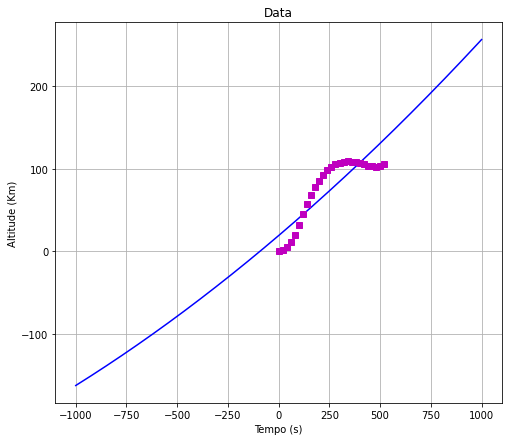

In [37]:
coefs = QuadraticFit2(x,y)
print(coefs)

print(x)
print(y)

x_new = np.arange(-1000, 1000.1,0.1)
y_new = [apllyFit2(x_n,coefs) for x_n in x_new]

Plotpattern(x,y,x,y,x_new,y_new)

In [38]:
aTe = np.array([
                [5, 2.5, 1.875], 
                [2.5, 1.875, 1.5625], 
                [1.875, 1.5625, 1.3828]]
             )

bTe = np.array([8.7680, 5.4514, 4.4015])
xTe = np.linalg.solve(aTe, bTe)
xTe

array([1.00507552, 0.86467585, 0.84316415])

[n+1 , x1, x2, x3]

[x1 , x2 , x3 ,x4]

[x2 , x3 , x4 , x5]

[x3 , x4, x5 , x6]


[y0, y1 , y2, y3] 

In [39]:
def PolinomialFit(x,y):

    n = len(x)
    sumX = np.sum(x)
    sumY = np.sum(y) 

    xSquare = [x[i]*x[i] for i in range(len(x))]
    sumxSquare = np.sum(xSquare)

    xCubic =  [x[i]**3 for i in range(len(x))]
    sumxCubic = np.sum(xCubic)

    xFourth = [x[i]**4 for i in range(len(x))]
    sumxFourth = np.sum(xFourth)

    xFith = [x[i]**5 for i in range(len(x))]
    sumxFith = np.sum(xFith)

    xSixth = [x[i]**6 for i in range(len(x))]
    sumxSixth = np.sum(xSixth)

    XtY = [x[i]*y[i] for i in range(len(x))]
    sumXtY = np.sum(XtY)

    #X2tY = [(x[i]**2)*y[i] for i in range(len(x))]
    X2tY = []
    for i in range(len(x)):
        X2tY.append((x[i]**2)*y[i])

    sumX2tY = np.sum(X2tY)

    X3tY = []
    for i in range(len(x)):
        X3tY.append((x[i]**3)*y[i])

    sumX3tY = np.sum(X3tY)

    A= np.array([[(n+1)     , sumX      , sumxSquare, sumxCubic],
                 [sumX      , sumxSquare, sumxCubic, sumxFourth],
                 [sumxSquare, sumxCubic , sumxFourth, sumxFith ],
                 [sumxCubic , sumxFourth, sumxFith  , sumxSixth ]])

    b = [sumY, sumXtY, sumX2tY, sumX3tY]
    
    # Find diagonal coefficients
    diag = np.diag(np.abs(A)) 

    # Find row sum without diagonal
    off_diag = np.sum(np.abs(A), axis=1) - diag 

    if np.all(diag > off_diag):
        print('matrix is diagonally dominant')
    else:
        print('NOT diagonally dominant')

    coefsResult = np.linalg.solve(A,b)
  
    return coefsResult

NOT diagonally dominant
[ 1.03840684e+02 -4.04743210e-03 -3.84540161e-05 -7.22942417e-07]
[  0  20  40  60  80 100 120 140 160 180 200 220 240 260 280 300 320 340
 360 380 400 420 440 460 480 500 520]
[-0.008, 1.244, 5.377, 11.617, 19.872, 31.412, 44.726, 57.396, 67.893, 77.485, 85.662, 92.481, 98.004, 102.301, 105.321, 107.449, 108.619, 108.942, 108.543, 107.69, 106.539, 105.142, 103.775, 102.807, 102.552, 103.297, 105.069]


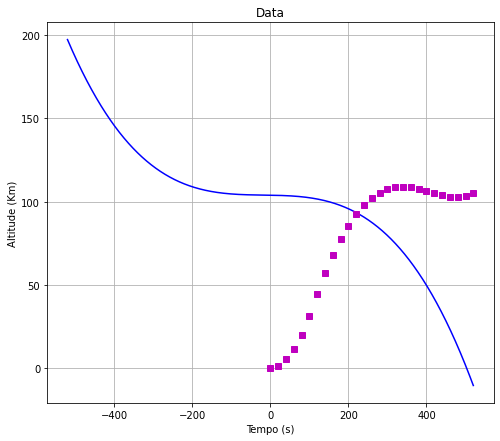

In [40]:
coefs = PolinomialFit(x,y)
print(coefs)

print(x)
print(y)

x_new = np.arange(-520, 520.1,0.1)
y_new = [apllyFit3(x_n,coefs) for x_n in x_new]

Plotpattern(x,y,x,y,x_new,y_new)

In [41]:
def PolinomialFit2(x,y):

    n = len(x)
    sumX = np.sum(x)
    sumY = np.sum(y) 

    xSquare = [x[i]*x[i] for i in range(len(x))]
    sumxSquare = np.sum(xSquare)

    xCubic =  [x[i]**3 for i in range(len(x))]
    sumxCubic = np.sum(xCubic)

    xFourth = [x[i]**4 for i in range(len(x))]
    sumxFourth = np.sum(xFourth)

    xFith = [x[i]**5 for i in range(len(x))]
    sumxFith = np.sum(xFith)

    xSixth = [x[i]**6 for i in range(len(x))]
    sumxSixth = np.sum(xSixth)

    xSeventh = [x[i]**7 for i in range(len(x))]
    sumxSeventh = np.sum(xSeventh)

    xEightth = [x[i]**8 for i in range(len(x))]
    sumxEightth = np.sum(xEightth)

    XtY = [x[i]*y[i] for i in range(len(x))]
    sumXtY = np.sum(XtY)

    #X2tY = [(x[i]**2)*y[i] for i in range(len(x))]
    X2tY = []
    for i in range(len(x)):
        X2tY.append((x[i]**2)*y[i])

    sumX2tY = np.sum(X2tY)

    X3tY = []
    for i in range(len(x)):
        X3tY.append((x[i]**3)*y[i])

    sumX3tY = np.sum(X3tY)

    X4tY = []
    for i in range(len(x)):
        X3tY.append((x[i]**4)*y[i])

    sumX4tY = np.sum(X4tY)

    A= np.array([[(n+1)     , sumX      , sumxSquare, sumxCubic, sumxFourth],
                 [sumX      , sumxSquare, sumxCubic, sumxFourth, sumxFith],
                 [sumxSquare, sumxCubic , sumxFourth, sumxFith, sumxSixth ],
                 [sumxCubic , sumxFourth, sumxFith  , sumxSixth, sumxSeventh],
                 [sumxFourth, sumxFith  , sumxSixth, sumxSeventh, sumxEightth]])

    b = [sumY, sumXtY, sumX2tY, sumX3tY, sumX4tY]
    
    # Find diagonal coefficients
    diag = np.diag(np.abs(A)) 

    # Find row sum without diagonal
    off_diag = np.sum(np.abs(A), axis=1) - diag 

    if np.all(diag > off_diag):
        print('matrix is diagonally dominant')
    else:
        print('NOT diagonally dominant')

    coefsResult = np.linalg.solve(A,b)
  
    return coefsResult

NOT diagonally dominant
[ 29.06333265  52.07758578 -20.15234192  18.88483926 -17.06931124]
[  0  20  40  60  80 100 120 140 160 180 200 220 240 260 280 300 320 340
 360 380 400 420 440 460 480 500 520]
[-0.008, 1.244, 5.377, 11.617, 19.872, 31.412, 44.726, 57.396, 67.893, 77.485, 85.662, 92.481, 98.004, 102.301, 105.321, 107.449, 108.619, 108.942, 108.543, 107.69, 106.539, 105.142, 103.775, 102.807, 102.552, 103.297, 105.069]


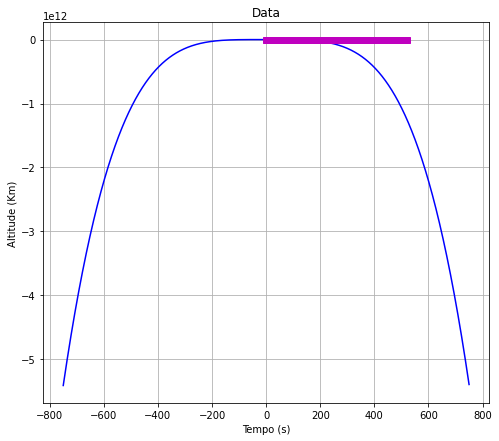

In [42]:
coefs = PolinomialFit2(x,y)
print(coefs)

print(x)
print(y)

x_new = np.arange(-750, 750.1,0.1)
y_new = [apllyFit4(x_n,coefs) for x_n in x_new]

Plotpattern(x,y,x,y,x_new,y_new)

NOT diagonally dominant
[ 0.53302727  2.50895273 -0.37469091]
[0, 0.25, 0.5, 0.75, 1.0]
[1.0, 1.284, 1.6487, 2.117, 2.7183]


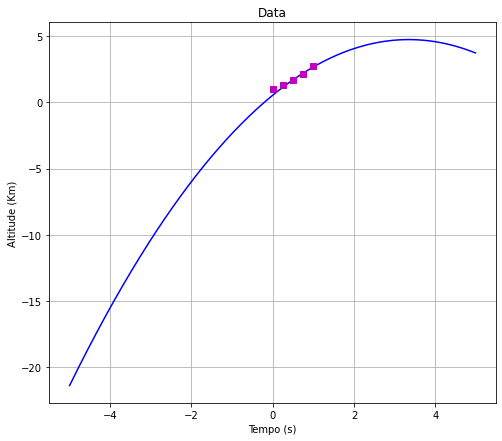

In [43]:
xtest = [0, 0.25, 0.5, 0.75, 1.0]
ytest = [1.0, 1.2840, 1.6487, 2.1170, 2.7183]

coefs = QuadraticFit2(xtest,ytest)
print(coefs)

print(xtest)
print(ytest)

x_new = np.arange(-5, 5,0.01)
y_new = [apllyFit2(x_n,coefs) for x_n in x_new]



Plotpattern(xtest,ytest,xtest,ytest,x_new,y_new)

# Spline

In [44]:
from scipy.interpolate import CubicSpline

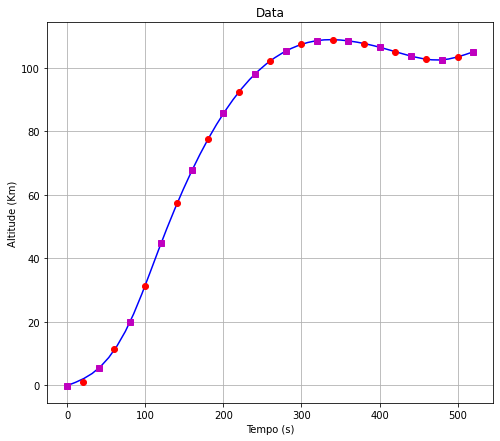

In [45]:
xtarget = np.arange(0, 560, 40)
ytarget = [y[i*2] for i in range(len(xtarget))]

f = CubicSpline(xtarget, ytarget, bc_type='natural')
x_new = np.linspace(0, 520)
y_new = f(x_new)

Plotpattern(x,y,xtarget,ytarget,x_new,y_new)

In [46]:
firstError = []
for i in range(len(x)):
    firstError.append(abs(f(x[i])-y[i]))

print(firstError)
print(np.sum(firstError))

[0.0, 0.807991787289106, 0.0, 0.5112253618673215, 0.0, 0.2935346601801676, 0.0, 0.44591327885336796, 0.0, 0.01950654476671332, 0.0, 0.018814457920228733, 0.0, 0.07425128691410521, 0.0, 0.011309310263740713, 0.0, 0.023636472030887035, 0.0, 0.02210519838736502, 0.0, 0.0012156784814578714, 0.0, 0.05234291231312227, 0.0, 0.1822809707710462, 0.0]
2.4641279200386297
